In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np

In [2]:
#importo i valori immobiliari presi da: https://fred.stlouisfed.org/series/QITR628BIS
#from google.colab import files
#files.upload()
#data = pd.read_csv(file_path, parse_dates=['DATE'])

file_path = '/content/valori_immobile.csv'
data = pd.read_csv(file_path, parse_dates=['DATE'])

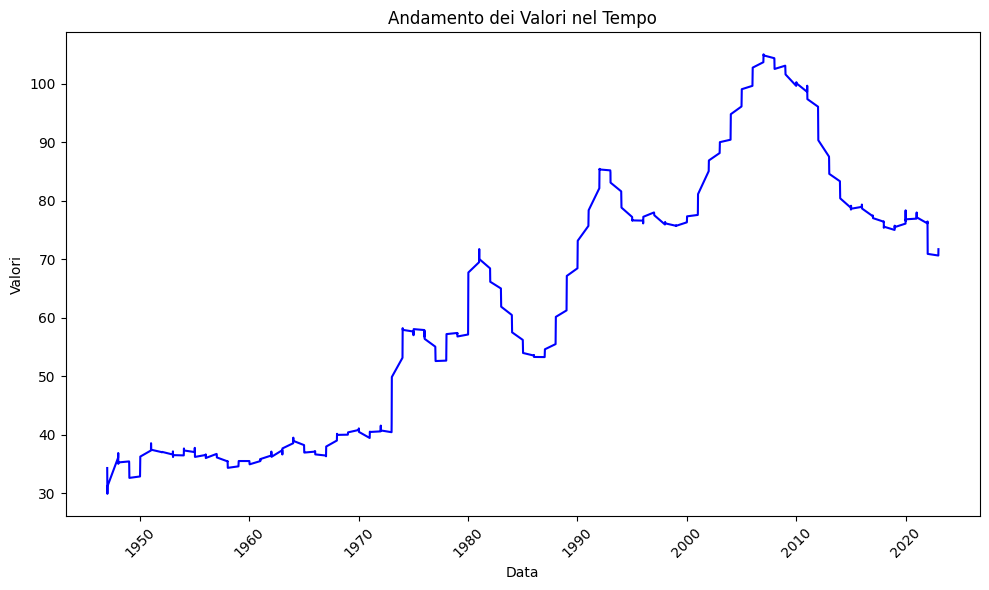

In [3]:
# Impostazione delle date come indice
data.set_index('DATE', inplace=True)

# Grafico a linea dei valori nel tempo
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['QITR628BIS'], color='blue')
plt.xlabel('Data')
plt.ylabel('Valori')
plt.title('Andamento dei Valori nel Tempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

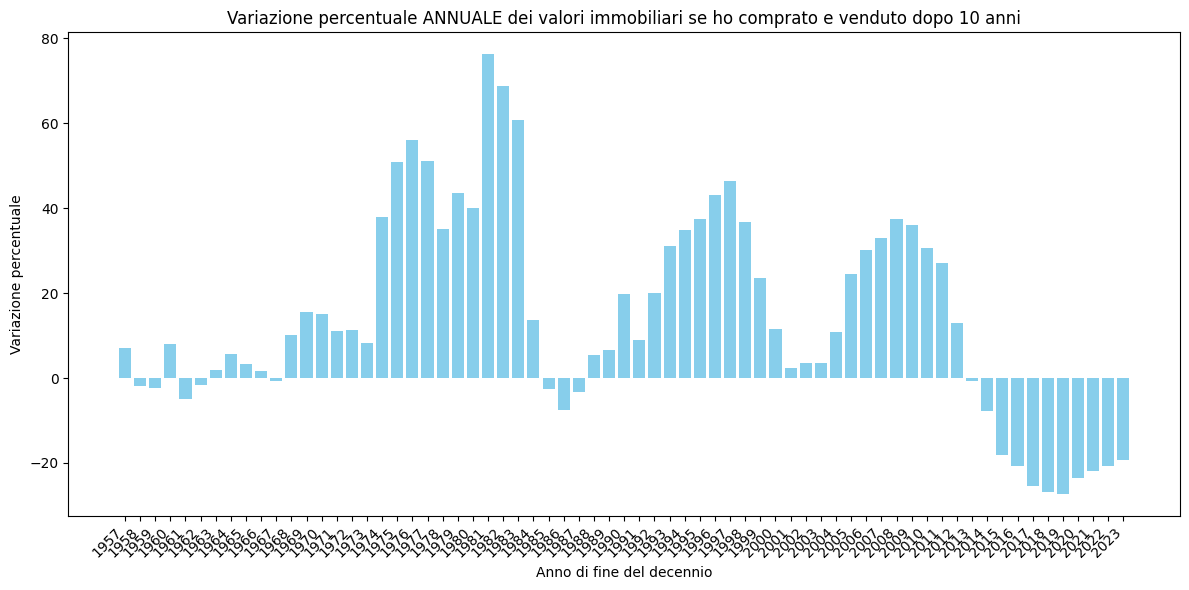

In [4]:
# Caricamento dei dati
file_path = 'valori_immobile.csv'
data = pd.read_csv(file_path, parse_dates=['DATE'])

# Raggruppa i dati per quadrimestri
data.set_index('DATE', inplace=True)

# Calcola la variazione percentuale per ogni periodo di 10 anni suddiviso in quadrimestri
start_year = 1947
end_year = 2023
results = []
labels = []  # Lista per le etichette dell'asse X

while start_year + 10 <= end_year:
    decade_data = data[f'{start_year}-01-01':f'{start_year + 10}-01-01']
    start_value = decade_data.iloc[0]['QITR628BIS']
    end_value = decade_data.iloc[-1]['QITR628BIS']
    percentage_change = ((end_value - start_value) / start_value) * 100
    results.append(percentage_change)
    labels.append(f'{start_year + 10}')  # Aggiungi l'anno di fine decennio come etichetta per l'asse X
    start_year += 1  # Avanza di un quadrimestre

# Plot dei risultati
plt.figure(figsize=(12, 6))
plt.bar(labels, results, color='skyblue')
plt.title('Variazione percentuale ANNUALE dei valori immobiliari se ho comprato e venduto dopo 10 anni')
plt.xlabel('Anno di fine del decennio')
plt.ylabel('Variazione percentuale')
plt.xticks(rotation=45, ha='right')  # Ruota le etichette sull'asse X per una migliore leggibilità
plt.tight_layout()
plt.show()

In [5]:
# Carica il file CSV
file_path = 'valori_immobile.csv'
data = pd.read_csv(file_path, parse_dates=['DATE'])

# Raggruppa i dati per quadrimestri
data.set_index('DATE', inplace=True)

# Calcola la variazione percentuale per ogni periodo di 10 anni suddiviso in quadrimestri
start_year = 1947
end_year = 2023
results = []
labels = []  # Lista per le etichette dell'asse X

while start_year + 10 <= end_year:
    for month in range(1, 13, 4):  # Loop su ogni quadrimestre
        start_date = f'{start_year:04d}-{month:02d}-01'
        end_date = f'{start_year + 10:04d}-{month:02d}-01'

        decade_data = data[start_date:end_date]
        start_value = decade_data.iloc[0]['QITR628BIS']
        end_value = decade_data.iloc[-1]['QITR628BIS']
        percentage_change = ((end_value - start_value) / start_value) * 100
        results.append(percentage_change)
        labels.append(f'{end_date}')  # Aggiungi la data di fine quadrimestre come etichetta per l'asse X

    start_year += 1  # Avanza di un quadrimestre

# Creazione del grafico interattivo con Plotly
fig = go.Figure(data=[go.Bar(x=labels, y=results, marker_color='skyblue')])
fig.update_layout(
    title='Variazione percentuale dei valori immobiliari per ogni quadrimestre di 10 anni',
    xaxis=dict(title='Data di fine del quadrimestre'),
    yaxis=dict(title='Variazione percentuale'),
    xaxis_tickangle=-45
)
fig.show()


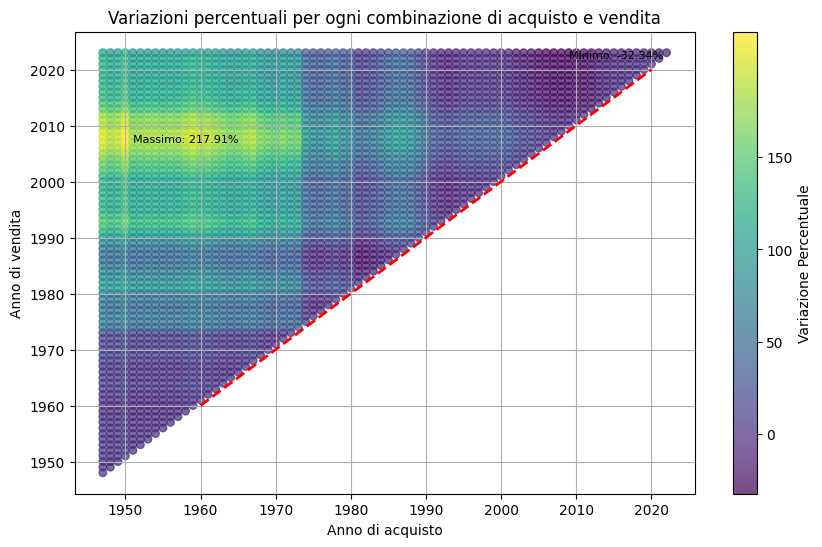

In [6]:
# Caricamento dei dati
file_path = 'valori_immobile.csv'
data = pd.read_csv(file_path, parse_dates=['DATE'])

# Raggruppa i dati per quadrimestri
data.set_index('DATE', inplace=True)

# Liste per salvare gli anni di acquisto e vendita e le variazioni percentuali
buy_years = []
sell_years = []
percentage_changes = []

# Calcola la variazione percentuale per tutte le combinazioni possibili
for buy_year in range(1947, 2023):
    for sell_year in range(buy_year + 1, 2024):
        start_date = f'{buy_year:04d}-01-01'
        end_date = f'{sell_year:04d}-01-01'

        period_data = data[start_date:end_date]
        start_value = period_data.iloc[0]['QITR628BIS']
        end_value = period_data.iloc[-1]['QITR628BIS']

        # Calcola la variazione percentuale e aggiungi alle liste
        if start_value != 0:  # Evita divisione per zero
            percentage_change = ((end_value - start_value) / start_value) * 100
            buy_years.append(buy_year)
            sell_years.append(sell_year)
            percentage_changes.append(percentage_change)

# Grafico a dispersione delle variazioni percentuali per ogni combinazione
plt.figure(figsize=(10, 6))
plt.scatter(buy_years, sell_years, c=percentage_changes, cmap='viridis', alpha=0.7, s=30, marker='o')
plt.colorbar(label='Variazione Percentuale', ticks=[-50, 0, 50, 100, 150])
plt.xlabel('Anno di acquisto')
plt.ylabel('Anno di vendita')
plt.title('Variazioni percentuali per ogni combinazione di acquisto e vendita')
plt.grid(True)

# Linea di riferimento per l'acquisto e la vendita nello stesso anno
plt.plot([1960, 2020], [1960, 2020], color='red', linestyle='--', linewidth=2)

# Etichette per variazioni percentuali massime e minime
max_index = percentage_changes.index(max(percentage_changes))
min_index = percentage_changes.index(min(percentage_changes))
plt.text(buy_years[max_index] + 1, sell_years[max_index] - 1, f'Massimo: {max(percentage_changes):.2f}%', fontsize=8)
plt.text(buy_years[min_index] + 1, sell_years[min_index] - 1, f'Minimo: {min(percentage_changes):.2f}%', fontsize=8)

plt.show()

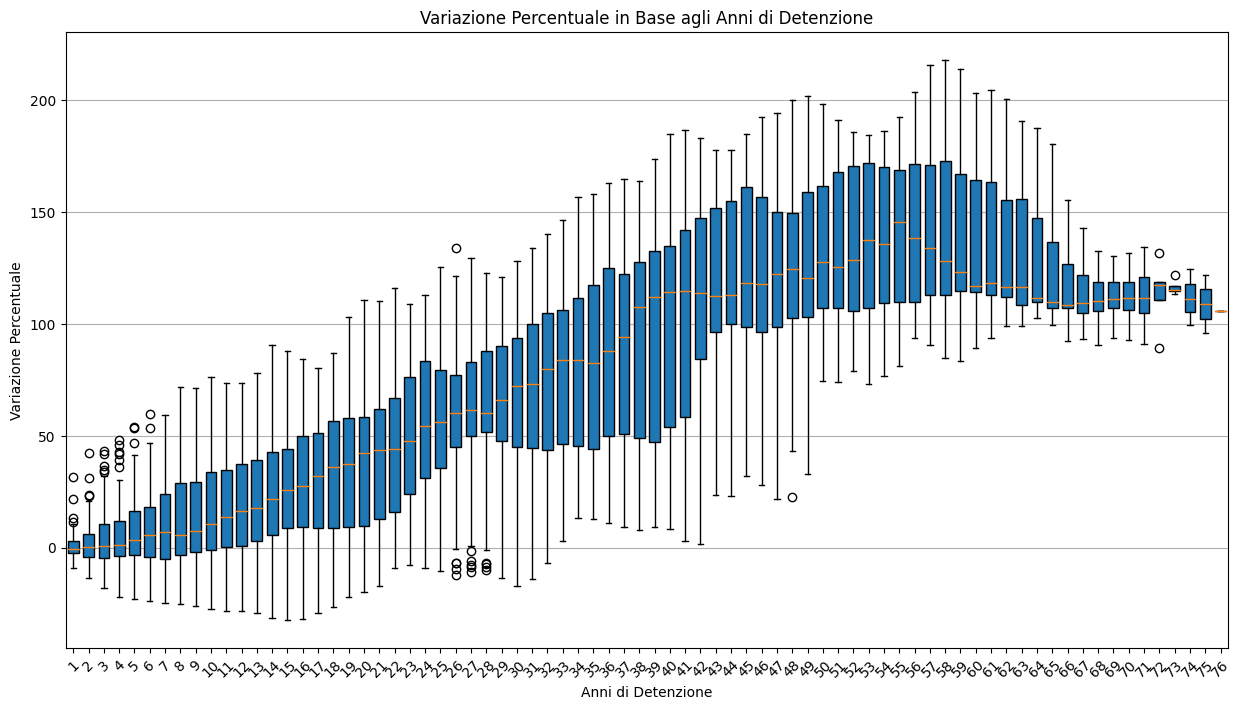

In [7]:
# Caricamento dei dati
file_path = 'valori_immobile.csv'
data = pd.read_csv(file_path, parse_dates=['DATE'])

# Raggruppa i dati per quadrimestri
data.set_index('DATE', inplace=True)

# Dizionario per salvare le variazioni percentuali in base agli anni di detenzione
detention_changes = {}

# Calcola la variazione percentuale per tutte le combinazioni possibili
for buy_year in range(1947, 2023):
    for sell_year in range(buy_year + 1, 2024):
        start_date = f'{buy_year:04d}-01-01'
        end_date = f'{sell_year:04d}-01-01'

        period_data = data[start_date:end_date]
        start_value = period_data.iloc[0]['QITR628BIS']
        end_value = period_data.iloc[-1]['QITR628BIS']

        # Calcola la variazione percentuale
        if start_value != 0:  # Evita divisione per zero
            percentage_change = ((end_value - start_value) / start_value) * 100

            # Calcola gli anni di detenzione
            detention_years = sell_year - buy_year

            # Aggiungi la variazione percentuale al dizionario in base agli anni di detenzione
            if detention_years in detention_changes:
                detention_changes[detention_years].append(percentage_change)
            else:
                detention_changes[detention_years] = [percentage_change]

# Crea un elenco di variazioni percentuali per ogni anno di detenzione
detention_years = list(detention_changes.keys())
percent_changes = [np.array(detention_changes[det]) for det in detention_years]

# Creazione del grafico
plt.figure(figsize=(15, 8))
plt.boxplot(percent_changes, positions=detention_years, patch_artist=True, widths=0.7)
plt.xlabel('Anni di Detenzione')
plt.ylabel('Variazione Percentuale')
plt.title('Variazione Percentuale in Base agli Anni di Detenzione')
plt.xticks(rotation=45)  # Ruota gli anni sull'asse x
plt.grid(axis='y')
plt.show()


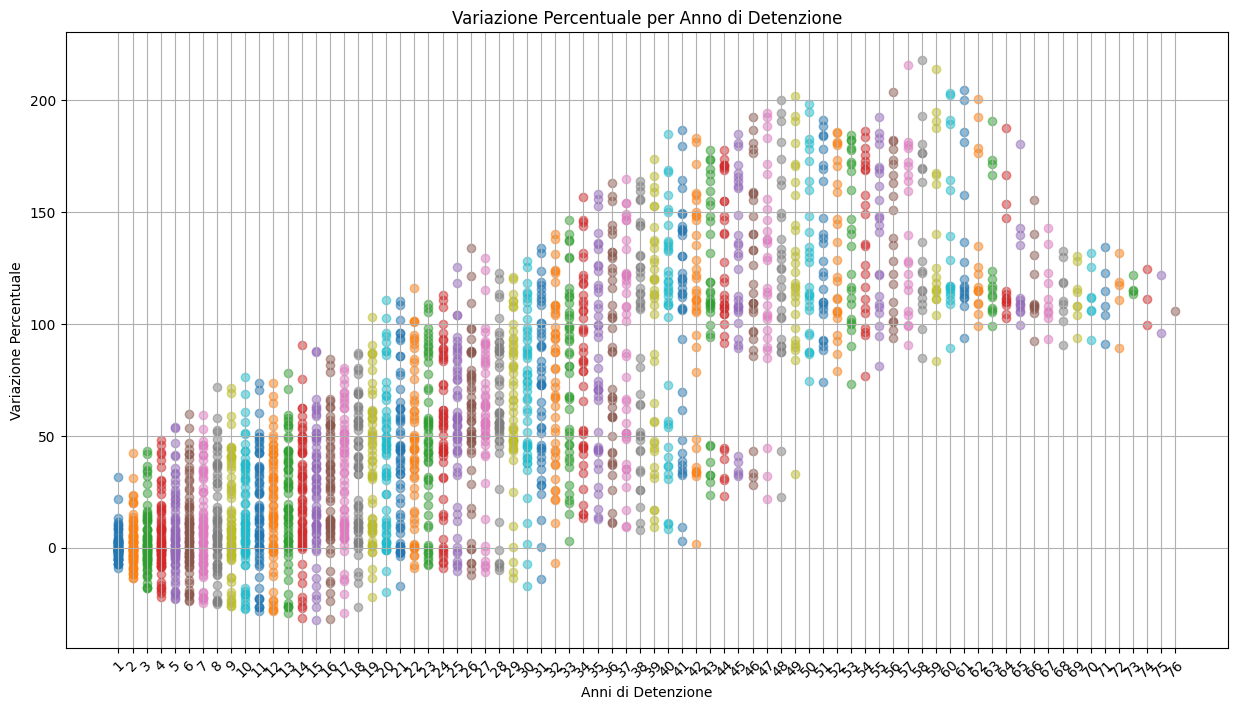

In [8]:
# Caricamento dei dati
file_path = 'valori_immobile.csv'
data = pd.read_csv(file_path, parse_dates=['DATE'])

# Raggruppa i dati per quadrimestri
data.set_index('DATE', inplace=True)

# Dizionario per salvare le variazioni percentuali in base agli anni di detenzione
detention_changes = {}

# Calcola la variazione percentuale per tutte le combinazioni possibili
for buy_year in range(1947, 2023):
    for sell_year in range(buy_year + 1, 2024):
        start_date = f'{buy_year:04d}-01-01'
        end_date = f'{sell_year:04d}-01-01'

        period_data = data[start_date:end_date]
        start_value = period_data.iloc[0]['QITR628BIS']
        end_value = period_data.iloc[-1]['QITR628BIS']

        # Calcola la variazione percentuale
        if start_value != 0:  # Evita divisione per zero
            percentage_change = ((end_value - start_value) / start_value) * 100

            # Calcola gli anni di detenzione
            detention_years = sell_year - buy_year

            # Aggiungi la variazione percentuale al dizionario in base agli anni di detenzione
            if detention_years in detention_changes:
                detention_changes[detention_years].append(percentage_change)
            else:
                detention_changes[detention_years] = [percentage_change]

# Creazione dello scatter plot per la variazione percentuale in base agli anni di detenzione
plt.figure(figsize=(15, 8))

for years, changes in detention_changes.items():
    plt.scatter([years] * len(changes), changes, alpha=0.5)

plt.xlabel('Anni di Detenzione')
plt.ylabel('Variazione Percentuale')
plt.title('Variazione Percentuale per Anno di Detenzione')
plt.xticks(rotation=45)  # Ruota gli anni sull'asse x
plt.grid(True)
plt.xticks(list(detention_changes.keys()))
plt.show()

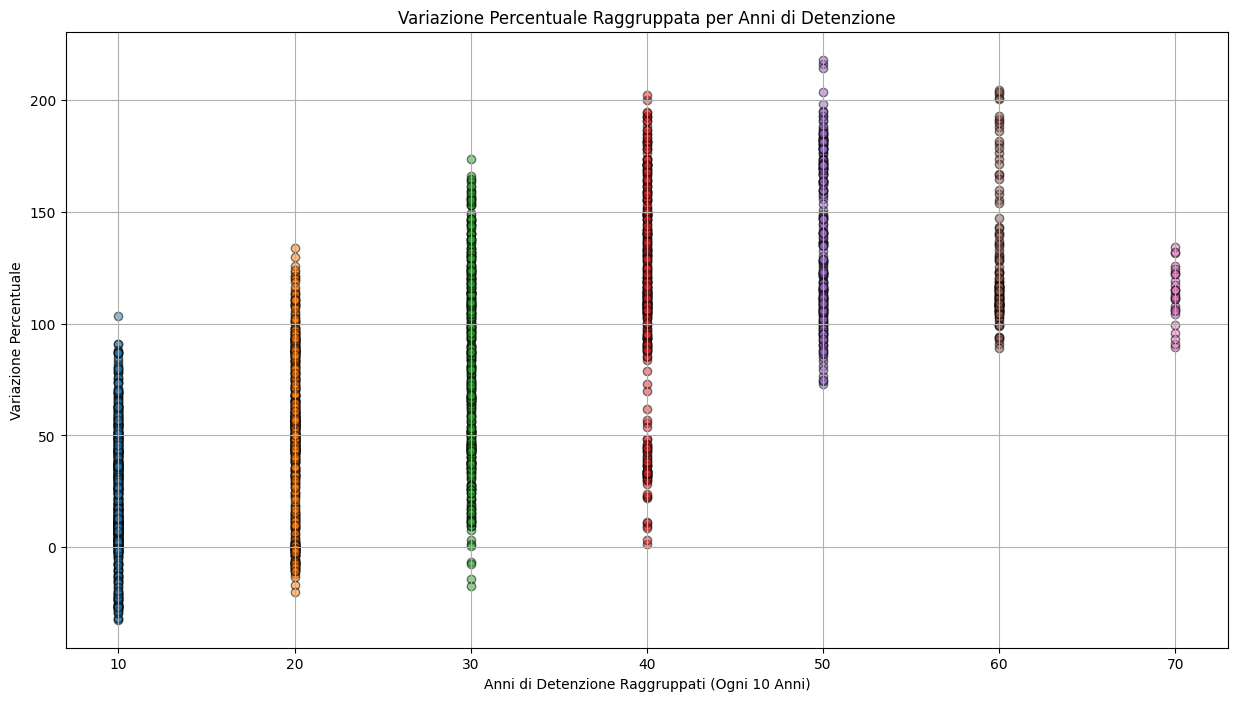

In [9]:
# Carica il file CSV
file_path = 'valori_immobile.csv'
data = pd.read_csv(file_path, parse_dates=['DATE'])

# Raggruppa i dati per quadrimestri
data.set_index('DATE', inplace=True)

# Dizionario per salvare le variazioni percentuali in base agli anni di detenzione
detention_changes = {}

# Calcola la variazione percentuale per tutte le combinazioni possibili
for buy_year in range(1947, 2023):
    for sell_year in range(buy_year + 1, 2024):
        start_date = f'{buy_year:04d}-01-01'
        end_date = f'{sell_year:04d}-01-01'

        period_data = data[start_date:end_date]
        start_value = period_data.iloc[0]['QITR628BIS']
        end_value = period_data.iloc[-1]['QITR628BIS']

        # Calcola la variazione percentuale
        if start_value != 0:  # Evita divisione per zero
            percentage_change = ((end_value - start_value) / start_value) * 100

            # Calcola gli anni di detenzione e raggruppali in base a intervalli specifici (es. 10 anni)
            detention_years = sell_year - buy_year
            grouped_years = detention_years // 10 * 10

            # Aggiungi la variazione percentuale al dizionario in base agli anni di detenzione raggruppati
            if grouped_years != 0:  # Escludi gli anni di detenzione pari a zero
                if grouped_years in detention_changes:
                    detention_changes[grouped_years].append(percentage_change)
                else:
                    detention_changes[grouped_years] = [percentage_change]

# Creazione dello scatter plot per la variazione percentuale in base agli anni di detenzione
plt.figure(figsize=(15, 8))

# Creazione degli scatter plot per ogni combinazione di anni di detenzione raggruppati
for years, changes in detention_changes.items():
    plt.scatter([years] * len(changes), changes, edgecolor='black', alpha=0.5)

plt.xlabel('Anni di Detenzione Raggruppati (Ogni 10 Anni)')
plt.ylabel('Variazione Percentuale')
plt.title('Variazione Percentuale Raggruppata per Anni di Detenzione')
plt.grid(True)
plt.xticks(list(detention_changes.keys()))
plt.show()


In [11]:
# Caricamento dei dati
file_path = 'valori_immobile.csv'
data = pd.read_csv(file_path, parse_dates=['DATE'])

# Impostazione delle date come indice
data.set_index('DATE', inplace=True)

# Dizionario per salvare le variazioni percentuali in base agli anni di detenzione
detention_changes = {}

# Calcolo della variazione percentuale per tutte le combinazioni possibili a partire dal 1980
for buy_year in range(1980, 2023):
    for sell_year in range(buy_year + 1, 2024):
        start_date = f'{buy_year:04d}-01-01'
        end_date = f'{sell_year:04d}-01-01'

        period_data = data[start_date:end_date]
        start_value = period_data.iloc[0]['QITR628BIS']
        end_value = period_data.iloc[-1]['QITR628BIS']

        # Calcolo della variazione percentuale
        if start_value != 0:  # Evita divisione per zero
            percentage_change = ((end_value - start_value) / start_value) * 100

            # Calcolo degli anni di detenzione
            detention_years = sell_year - buy_year

            # Aggiungi la variazione percentuale al dizionario in base agli anni di detenzione
            if detention_years in detention_changes:
                detention_changes[detention_years].append(percentage_change)
            else:
                detention_changes[detention_years] = [percentage_change]

# Calcolo della media delle variazioni percentuali per ogni anno di detenzione
average_percentage_by_year = {}
for years, changes in detention_changes.items():
    average_percentage_by_year[years] = sum(changes) / len(changes)

# Stampare le percentuali medie per ogni anno di detenzione
for years, average in average_percentage_by_year.items():
    print(f'Anni di Detenzione: {years}, Percentuale Media: {average:.2f}%')

Anni di Detenzione: 1, Percentuale Media: 0.66%
Anni di Detenzione: 2, Percentuale Media: 1.19%
Anni di Detenzione: 3, Percentuale Media: 1.91%
Anni di Detenzione: 4, Percentuale Media: 2.80%
Anni di Detenzione: 5, Percentuale Media: 3.85%
Anni di Detenzione: 6, Percentuale Media: 5.10%
Anni di Detenzione: 7, Percentuale Media: 6.46%
Anni di Detenzione: 8, Percentuale Media: 7.84%
Anni di Detenzione: 9, Percentuale Media: 9.14%
Anni di Detenzione: 10, Percentuale Media: 10.40%
Anni di Detenzione: 11, Percentuale Media: 11.56%
Anni di Detenzione: 12, Percentuale Media: 12.71%
Anni di Detenzione: 13, Percentuale Media: 13.71%
Anni di Detenzione: 14, Percentuale Media: 14.67%
Anni di Detenzione: 15, Percentuale Media: 16.04%
Anni di Detenzione: 16, Percentuale Media: 17.91%
Anni di Detenzione: 17, Percentuale Media: 20.00%
Anni di Detenzione: 18, Percentuale Media: 22.04%
Anni di Detenzione: 19, Percentuale Media: 24.24%
Anni di Detenzione: 20, Percentuale Media: 26.40%
Anni di Detenzione

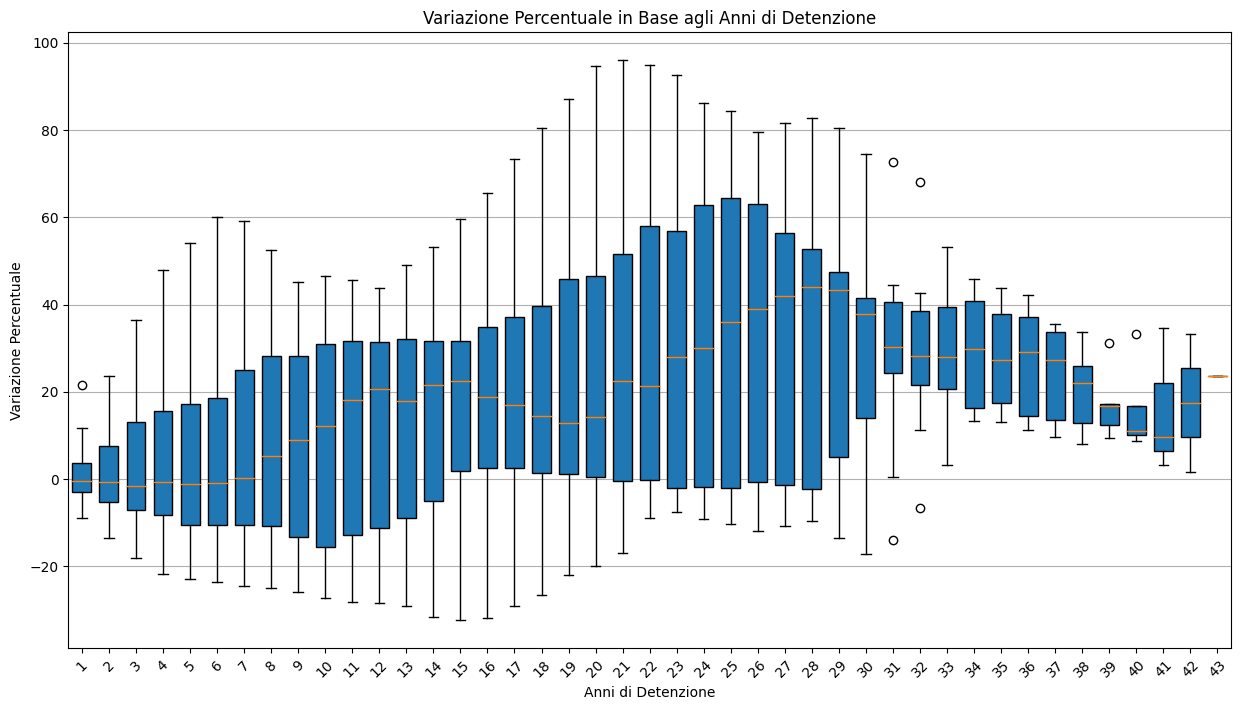

In [12]:
# Caricamento dei dati
file_path = 'valori_immobile.csv'
data = pd.read_csv(file_path, parse_dates=['DATE'])

# Impostazione delle date come indice
data.set_index('DATE', inplace=True)

# Dizionario per salvare le variazioni percentuali in base agli anni di detenzione
detention_changes = {}

# Calcolo della variazione percentuale per tutte le combinazioni possibili a partire dal 1980
for buy_year in range(1980, 2023):
    for sell_year in range(buy_year + 1, 2024):
        start_date = f'{buy_year:04d}-01-01'
        end_date = f'{sell_year:04d}-01-01'

        period_data = data[start_date:end_date]
        start_value = period_data.iloc[0]['QITR628BIS']
        end_value = period_data.iloc[-1]['QITR628BIS']

        # Calcolo della variazione percentuale
        if start_value != 0:  # Evita divisione per zero
            percentage_change = ((end_value - start_value) / start_value) * 100

            # Calcolo degli anni di detenzione
            detention_years = sell_year - buy_year

            # Aggiungi la variazione percentuale al dizionario in base agli anni di detenzione
            if detention_years in detention_changes:
                detention_changes[detention_years].append(percentage_change)
            else:
                detention_changes[detention_years] = [percentage_change]

# Crea un elenco di variazioni percentuali per ogni anno di detenzione
detention_years = list(detention_changes.keys())
percent_changes = [np.array(detention_changes[det]) for det in detention_years]

# Creazione del grafico
plt.figure(figsize=(15, 8))
plt.boxplot(percent_changes, positions=detention_years, patch_artist=True, widths=0.7)
plt.xlabel('Anni di Detenzione')
plt.ylabel('Variazione Percentuale')
plt.title('Variazione Percentuale in Base agli Anni di Detenzione')
plt.xticks(rotation=45)  # Ruota gli anni sull'asse x
plt.grid(axis='y')
plt.show()


In [19]:
from google.colab import files
files.upload()

Saving inflazionemediaitalia.csv to inflazionemediaitalia.csv


{'inflazionemediaitalia.csv': b'ANNO,Media annua\r\n1955,2.30%\r\n1956,3.40%\r\n1957,1.30%\r\n1958,2.80%\r\n1959,-0.40%\r\n1960,2.30%\r\n1961,2.10%\r\n1962,4.70%\r\n1963,7.50%\r\n1964,5.90%\r\n1965,4.60%\r\n1966,2.30%\r\n1967,3.70%\r\n1968,1.40%\r\n1969,2.60%\r\n1970,5%\r\n1971,4.80%\r\n1972,5.70%\r\n1973,10.80%\r\n1974,19.10%\r\n1975,17%\r\n1976,16.80%\r\n1977,17%\r\n1978,12.10%\r\n1979,14.80%\r\n1980,21.20%\r\n1981,17.80%\r\n1982,16.50%\r\n1983,14.70%\r\n1984,10.80%\r\n1985,9.20%\r\n1986,5.80%\r\n1987,4.80%\r\n1988,5%\r\n1989,6.30%\r\n1990,6.50%\r\n1991,6.20%\r\n1992,5.30%\r\n1993,4.70%\r\n1994,4.10%\r\n1995,5.30%\r\n1996,4%\r\n1997,2%\r\n1998,2%\r\n1999,1.70%\r\n2000,2.50%\r\n2001,2.70%\r\n2002,2.50%\r\n2003,2.70%\r\n2004,2.20%\r\n2005,1.90%\r\n2006,2.10%\r\n2007,1.80%\r\n2008,3.30%\r\n2009,0.80%\r\n2010,1.50%\r\n2011,2.70%\r\n2012,3%\r\n2013,1.20%\r\n2014,0.20%\r\n2015,0.10%\r\n2016,-0.10%\r\n2017,1.20%\r\n2018,1.20%\r\n2019,0.60%\r\n2020,-0.20%\r\n2021,1.90%\r\n2022,8.10%\r\n2023,

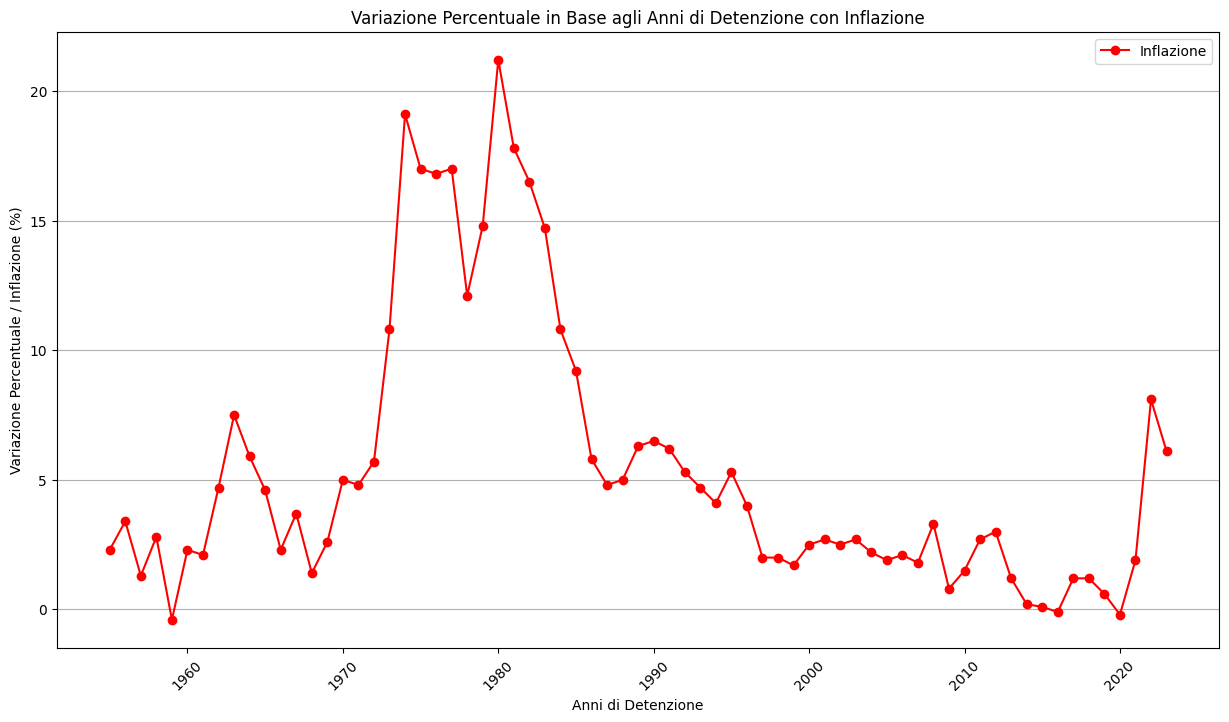

In [22]:
# Carica i dati dell'inflazione
file_path_inflazione = 'inflazionemediaitalia.csv'
data_inflazione = pd.read_csv(file_path_inflazione)

# Grafico dell'inflazione in relazione agli anni di detenzione
years = sorted(inflation_data.keys())
inflation_values = [inflation_data[year] for year in years]

plt.figure(figsize=(15, 8))

# Linea dell'inflazione in relazione agli anni di detenzione
plt.plot(years, inflation_values, marker='o', linestyle='-', color='red', label='Inflazione')

plt.xlabel('Anni di Detenzione')
plt.ylabel('Variazione Percentuale / Inflazione (%)')
plt.title('Variazione Percentuale in Base agli Anni di Detenzione con Inflazione')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()



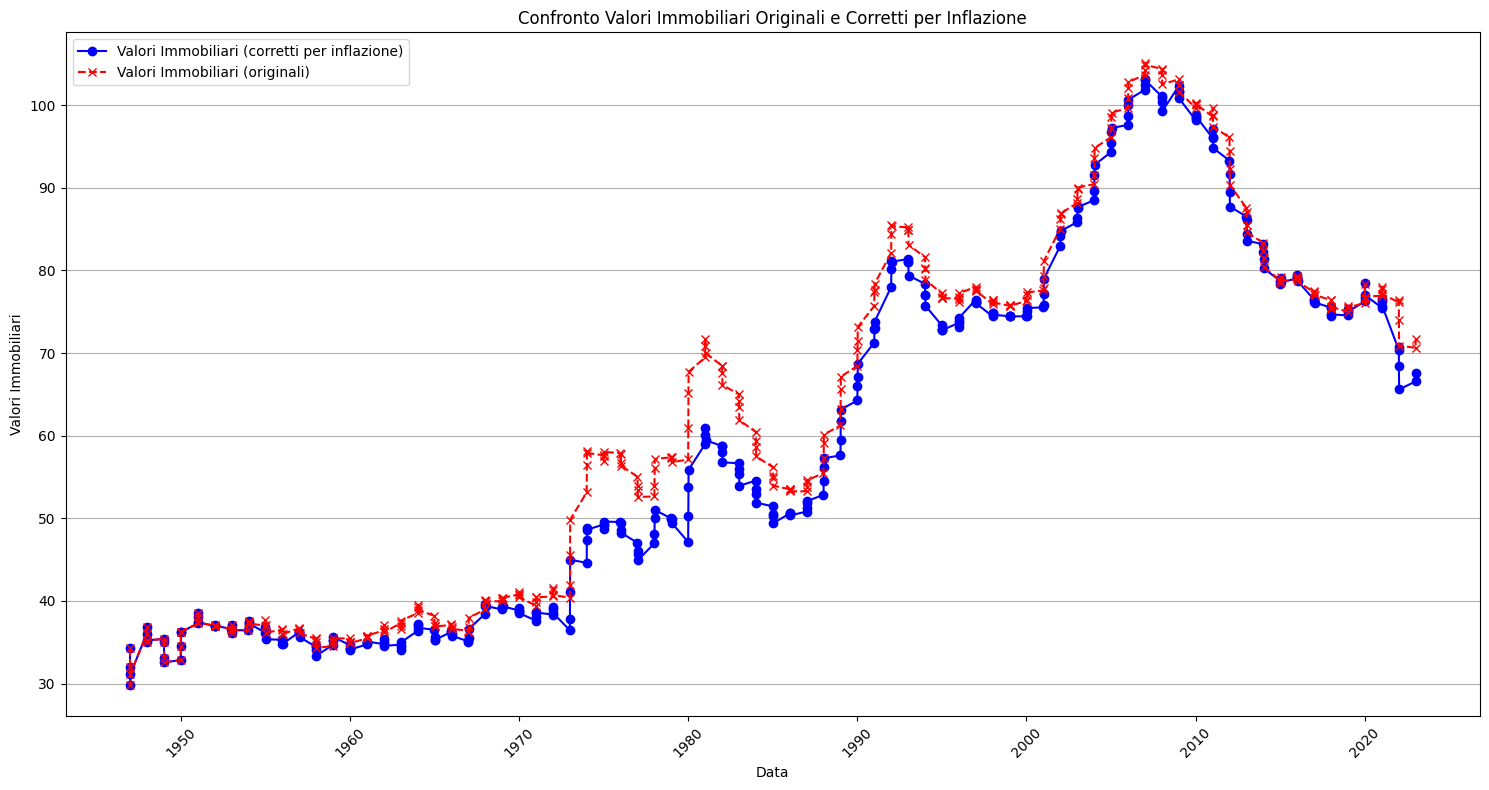

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica i dati dei valori immobiliari
file_path_immobili = 'valori_immobile.csv'
data_immobili = pd.read_csv(file_path_immobili, parse_dates=['DATE'])

# Carica i dati dell'inflazione
file_path_inflazione = 'inflazionemediaitalia.csv'
data_inflazione = pd.read_csv(file_path_inflazione)

# Converti l'inflazione in numeri decimali (se necessario)
data_inflazione['Media annua'] = data_inflazione['Media annua'].str.rstrip('%').astype(float)

# Calcola la media annua dell'inflazione
inflation_data = data_inflazione.set_index('ANNO')['Media annua'].to_dict()

# Calcola le variazioni reali dei valori immobiliari in base all'inflazione
adjusted_values = []
original_values = data_immobili['QITR628BIS'].tolist()  # Lista dei valori immobiliari originali

for idx, row in data_immobili.iterrows():
    year = row['DATE'].year
    inflation = inflation_data.get(year, 0)
    inflation_factor = (100 + inflation) / 100  # Fattore di aggiustamento per l'inflazione
    adjusted_value = original_values[idx] / inflation_factor  # Valori immobiliari originali corretti per l'inflazione
    adjusted_values.append(adjusted_value)

# Aggiungi i valori degli immobili corretti al DataFrame originale
data_immobili['Adjusted_Values'] = adjusted_values

# Grafico delle variazioni reali e non corrette dei valori immobiliari
plt.figure(figsize=(15, 8))

# Linea per i valori immobiliari corretti per l'inflazione
plt.plot(data_immobili['DATE'], data_immobili['Adjusted_Values'], marker='o', linestyle='-', color='blue', label='Valori Immobiliari (corretti per inflazione)')

# Linea per i valori immobiliari originali
plt.plot(data_immobili['DATE'], data_immobili['QITR628BIS'], marker='x', linestyle='--', color='red', label='Valori Immobiliari (originali)')

plt.xlabel('Data')
plt.ylabel('Valori Immobiliari')
plt.title('Confronto Valori Immobiliari Originali e Corretti per Inflazione')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()

# Mostra il grafico
plt.show()


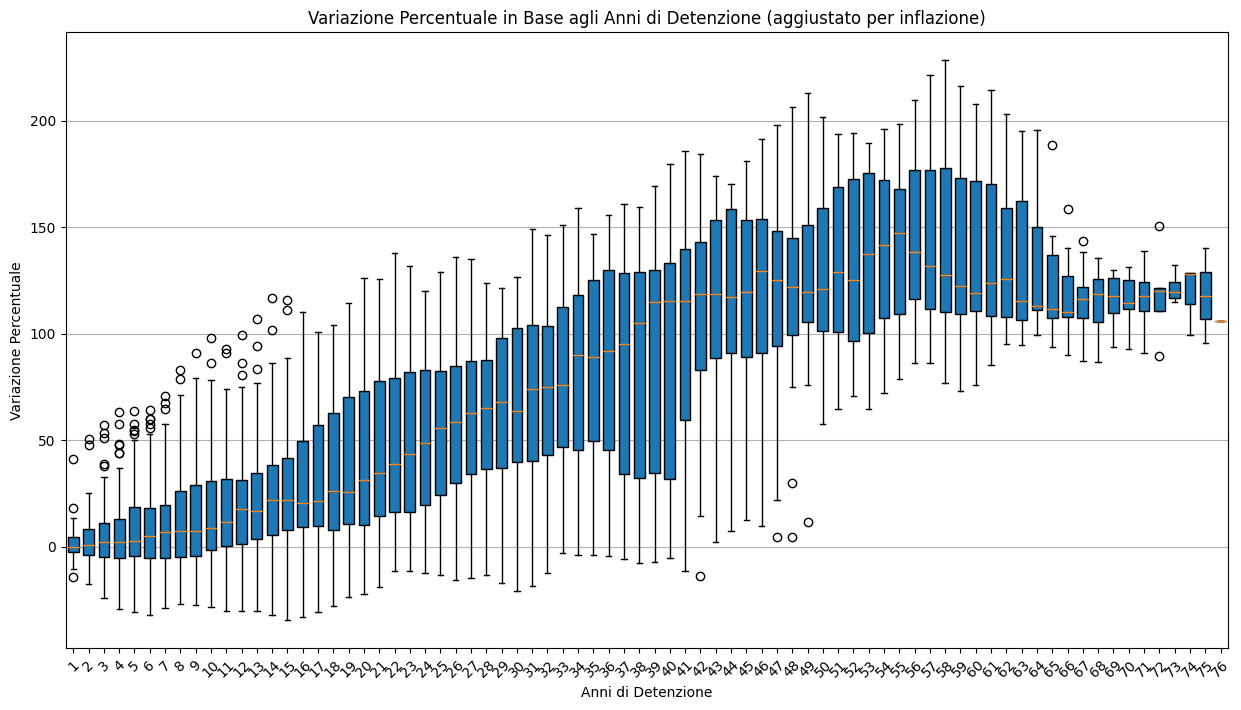

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dei dati sui valori immobiliari
file_path = 'valori_immobile.csv'
data = pd.read_csv(file_path, parse_dates=['DATE'])

# Caricamento dei dati sull'inflazione
file_path_inflazione = 'inflazionemediaitalia.csv'
data_inflazione = pd.read_csv(file_path_inflazione)

# Converti l'inflazione in numeri decimali (se necessario)
data_inflazione['Media annua'] = data_inflazione['Media annua'].str.rstrip('%').astype(float)

# Calcola la correzione per l'inflazione dei valori immobiliari
inflation_data = data_inflazione.set_index('ANNO')['Media annua'].to_dict()

for year in range(1947, 2023):
    inflation = inflation_data.get(year, 0)
    inflation_factor = (100 + inflation) / 100

    data_year = data[data['DATE'].dt.year == year]
    data.loc[data['DATE'].dt.year == year, 'QITR628BIS'] *= inflation_factor

# Raggruppa i dati per quadrimestri
data.set_index('DATE', inplace=True)

# Dizionario per salvare le variazioni percentuali in base agli anni di detenzione
detention_changes = {}

# Calcola la variazione percentuale per tutte le combinazioni possibili
for buy_year in range(1947, 2023):
    for sell_year in range(buy_year + 1, 2024):
        start_date = f'{buy_year:04d}-01-01'
        end_date = f'{sell_year:04d}-01-01'

        period_data = data[start_date:end_date]
        start_value = period_data.iloc[0]['QITR628BIS']
        end_value = period_data.iloc[-1]['QITR628BIS']

        # Calcola la variazione percentuale
        if start_value != 0:  # Evita divisione per zero
            percentage_change = ((end_value - start_value) / start_value) * 100

            # Calcola gli anni di detenzione
            detention_years = sell_year - buy_year

            # Aggiungi la variazione percentuale al dizionario in base agli anni di detenzione
            if detention_years in detention_changes:
                detention_changes[detention_years].append(percentage_change)
            else:
                detention_changes[detention_years] = [percentage_change]

# Crea un elenco di variazioni percentuali per ogni anno di detenzione
detention_years = list(detention_changes.keys())
percent_changes = [np.array(detention_changes[det]) for det in detention_years]

# Creazione del grafico
plt.figure(figsize=(15, 8))
plt.boxplot(percent_changes, positions=detention_years, patch_artist=True, widths=0.7)
plt.xlabel('Anni di Detenzione')
plt.ylabel('Variazione Percentuale')
plt.title('Variazione Percentuale in Base agli Anni di Detenzione (aggiustato per inflazione)')
plt.xticks(rotation=45)  # Ruota gli anni sull'asse x
plt.grid(axis='y')
plt.show()


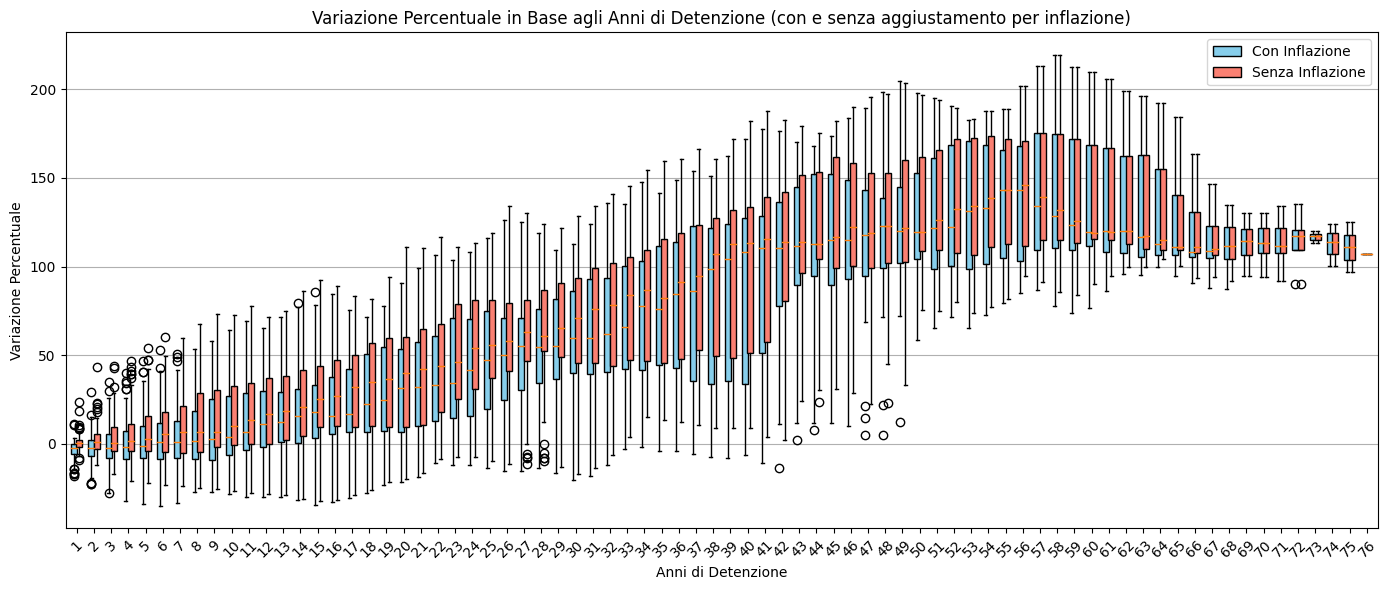

In [66]:
# Caricamento dei dati sui valori immobiliari
file_path = 'valori_immobile.csv'
data = pd.read_csv(file_path, parse_dates=['DATE'])

# Caricamento dei dati sull'inflazione
file_path_inflazione = 'inflazionemediaitalia.csv'
data_inflazione = pd.read_csv(file_path_inflazione)

# Converti l'inflazione in numeri decimali (se necessario)
data_inflazione['Media annua'] = data_inflazione['Media annua'].str.rstrip('%').astype(float)

# Calcola la correzione per l'inflazione dei valori immobiliari
inflation_data = data_inflazione.set_index('ANNO')['Media annua'].to_dict()

# Dizionario per salvare le variazioni percentuali in base agli anni di detenzione
detention_changes_with_inflation = {}
detention_changes_without_inflation = {}

# Calcola la variazione percentuale per tutte le combinazioni possibili
for buy_year in range(1947, 2023):
    for sell_year in range(buy_year + 1, 2024):
        start_date = f'{buy_year:04d}-01-01'
        end_date = f'{sell_year:04d}-01-01'

        # Filtra i dati in base alle date
        period_data = data[(data['DATE'] >= start_date) & (data['DATE'] < end_date)]

        # Ottieni i valori all'inizio e alla fine del periodo
        start_value = period_data.iloc[0]['QITR628BIS']
        end_value = period_data.iloc[-1]['QITR628BIS']

        # Calcola la correzione per l'inflazione
        start_year = int(start_date[:4])
        inflation = inflation_data.get(start_year, 0)
        inflation_factor = (100 + inflation) / 100
        start_value_adjusted = start_value * inflation_factor

        # Calcola la variazione percentuale
        if start_value_adjusted != 0:  # Evita divisione per zero
            percentage_change = ((end_value - start_value_adjusted) / start_value_adjusted) * 100

            # Calcola gli anni di detenzione
            detention_years = sell_year - buy_year

            # Aggiungi la variazione percentuale al dizionario in base agli anni di detenzione
            detention_changes_with_inflation.setdefault(detention_years, []).append(percentage_change)
            detention_changes_without_inflation.setdefault(detention_years, []).append(((end_value - start_value) / start_value) * 100)

# Creazione del grafico
plt.figure(figsize=(14, 6))

# Boxplot per i valori con l'aggiustamento per inflazione (colore blu)
box_with_inflation = plt.boxplot(detention_changes_with_inflation.values(), positions=np.arange(1, len(detention_changes_with_inflation) + 1) - 0.15,
                                 patch_artist=True, widths=0.35, boxprops=dict(facecolor="skyblue"))

# Boxplot per i valori senza l'aggiustamento per inflazione (colore rosso)
box_without_inflation = plt.boxplot(detention_changes_without_inflation.values(), positions=np.arange(1, len(detention_changes_without_inflation) + 1) + 0.15,
                                    patch_artist=True, widths=0.35, boxprops=dict(facecolor="salmon"))

# Impostazioni per il grafico
plt.xlabel('Anni di Detenzione')
plt.ylabel('Variazione Percentuale')
plt.title('Variazione Percentuale in Base agli Anni di Detenzione (con e senza aggiustamento per inflazione)')
plt.grid(axis='y')

# Formattazione degli anni sull'asse x
plt.xticks(np.arange(1, max(detention_changes_with_inflation.keys()) + 1), rotation=45)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))

# Mostra il grafico
plt.legend([box_with_inflation["boxes"][0], box_without_inflation["boxes"][0]],
           ['Con Inflazione', 'Senza Inflazione'])
plt.tight_layout()
plt.show()
